In [1]:
from google.colab import drive
drive.mount('/content/drive')
import requests
from bs4 import BeautifulSoup
import json
import numpy as np
import pandas as pd
import math
import time
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import pickle

ValueError: mount failed

In [ ]:
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer
from pyspark.ml.recommendation import ALS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488490 sha256=dbb159fda469003e8b003a0dd0edc514b4e5cd4a8fec488da514eb69fcf426c6
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
# 유저 랭킹 추출


api_key='test_1a4d697d8169ffdbd510ef3b13988fa830a3a21ec8a4881521bbac806d143fa42a6dc2f56eb162f8a6d8bd7a0ee85253' #king 너희들은 나 못이겨
headers = {
    "Accept": "application/json",
    "x-nxopen-api-key": api_key
}

rank=[]

for i in range(1,10):
  url=f'https://open.api.nexon.com/maplestory/v1/ranking/overall?date=2023-12-22&page={i}'
  r=json.loads(requests.get(url, headers=headers).text)
  rank.append(r)

rank

[{'ranking': [{'date': '2023-12-22',
    'world_name': '루나',
    'ranking': 1,
    'character_name': '오지환',
    'character_level': 295,
    'character_exp': 864382134677378,
    'class_name': '프렌즈 월드',
    'sub_class_name': '키네시스',
    'character_popularity': 28657,
    'character_guildname': '자상'},
   {'date': '2023-12-22',
    'world_name': '스카니아',
    'ranking': 2,
    'character_name': '단솜',
    'character_level': 295,
    'character_exp': 322720843034331,
    'class_name': '기사단',
    'sub_class_name': '윈드브레이커',
    'character_popularity': 3039,
    'character_guildname': '봄연'},
   {'date': '2023-12-22',
    'world_name': '크로아',
    'ranking': 3,
    'character_name': '솝상',
    'character_level': 294,
    'character_exp': 180734648170034,
    'class_name': '마법사',
    'sub_class_name': '비숍',
    'character_popularity': 1459,
    'character_guildname': '생글'},
   {'date': '2023-12-22',
    'world_name': '스카니아',
    'ranking': 4,
    'character_name': '초코티',
    'character_level': 294,

In [ ]:
# 유저 닉네임으로 유저 ocid 추출

#윤대안 추가
char_name=['열린자과']
for j in range(len(rank)):
  char_name.extend([rank[j]['ranking'][i]['character_name'] for i in range(len(rank[j]['ranking']))])


ocid_user=[]
count=0

api_key='test_8a92e7fabc80b7d58041a895791f92d03255070b8a4b726e779d5b697a1de4a6efe8d04e6d233bd35cf2fabdeb93fb0d' #공부공부
headers = {
    "Accept": "application/json",
    "x-nxopen-api-key": api_key
}

for i in range(len(char_name)):
  try:
    name_url=f'https://open.api.nexon.com/maplestory/v1/id?character_name={char_name[i]}'
    rr=json.loads(requests.get(name_url, headers=headers).text)
    ocid_user.append(rr['ocid'])
    time.sleep(0.2)
  except:
    pass
  count+=1
  if count%50==0:
    print(f"{count}만큼 ocid 추출 완료//현재 길이:{len(ocid_user)}//추출 효율 : {len(ocid_user)/count}")

ocid_user

50만큼 ocid 추출 완료//현재 길이:50//추출 효율 : 1.0
100만큼 ocid 추출 완료//현재 길이:99//추출 효율 : 0.99
150만큼 ocid 추출 완료//현재 길이:126//추출 효율 : 0.84
200만큼 ocid 추출 완료//현재 길이:142//추출 효율 : 0.71
250만큼 ocid 추출 완료//현재 길이:159//추출 효율 : 0.636
300만큼 ocid 추출 완료//현재 길이:174//추출 효율 : 0.58
350만큼 ocid 추출 완료//현재 길이:192//추출 효율 : 0.5485714285714286
400만큼 ocid 추출 완료//현재 길이:208//추출 효율 : 0.52
450만큼 ocid 추출 완료//현재 길이:224//추출 효율 : 0.49777777777777776
500만큼 ocid 추출 완료//현재 길이:241//추출 효율 : 0.482
550만큼 ocid 추출 완료//현재 길이:256//추출 효율 : 0.46545454545454545
600만큼 ocid 추출 완료//현재 길이:271//추출 효율 : 0.45166666666666666
650만큼 ocid 추출 완료//현재 길이:287//추출 효율 : 0.44153846153846155
700만큼 ocid 추출 완료//현재 길이:303//추출 효율 : 0.4328571428571429
750만큼 ocid 추출 완료//현재 길이:318//추출 효율 : 0.424
800만큼 ocid 추출 완료//현재 길이:334//추출 효율 : 0.4175
850만큼 ocid 추출 완료//현재 길이:350//추출 효율 : 0.4117647058823529
900만큼 ocid 추출 완료//현재 길이:367//추출 효율 : 0.4077777777777778
950만큼 ocid 추출 완료//현재 길이:387//추출 효율 : 0.4073684210526316
1000만큼 ocid 추출 완료//현재 길이:403//추출 효율 : 0.403
1050만큼 ocid 추출 완료//현재 길이:41

['abfe5a085534f33aba23e53cf49cb705',
 'e39f3066e9e969f077e0e2419dee386d',
 '9708ef10c2d20138c2b5d321340a2f07',
 '1bc9dd42a91c3d2e449d0f68a1ae34a2',
 '00b753b9b99df9f601f6a71a05893289',
 '551cf811a3a265eebe7eb02f9eee5edd',
 'b3cf3d03f6dc963cea1dfea31f7cb6a1',
 '598f53182d234b3b2f14c35eb39bfcfb',
 '01133746618e52a77a3807ffa65710a6efe8d04e6d233bd35cf2fabdeb93fb0d',
 '54c7946b52418d469992ff302a22bd19',
 '388ce5e41ea41aca1a6b3f091c33ef1e',
 '21ba749dd7f3de75400fad4bceeba174efe8d04e6d233bd35cf2fabdeb93fb0d',
 'ce18a029de25657899f7c67a09ab93d8',
 '74e0706af7088c6221683de04c0d54b3',
 '348a6d80245eee39464cfc937385673eefe8d04e6d233bd35cf2fabdeb93fb0d',
 'c54c36de504ffc979f67ec2c79d1b5eeefe8d04e6d233bd35cf2fabdeb93fb0d',
 '6c8faa577de2eca0c75f1969b0229d6aefe8d04e6d233bd35cf2fabdeb93fb0d',
 'a698b3825ebe1880bd5b60bf04b53c82',
 'df13ff995b665aa69c9eebd1b8c1b33f',
 'edd4c2b01d4ceb53c67af80a9cfae4b6efe8d04e6d233bd35cf2fabdeb93fb0d',
 'a7fb8449d6ea7bd726550714d4cfda7d',
 'a85c81600035db90a5def4782e093

In [ ]:
# ocid로 유저 캐시템 데이터 추출
cashitem=[]
count=0

api_key='test_8a92e7fabc80b7d58041a895791f92d024badf63953c5f5dc2ef1669e9b39336efe8d04e6d233bd35cf2fabdeb93fb0d' #커커커컼커커컼커닝시티
headers = {
    "Accept": "application/json",
    "x-nxopen-api-key": api_key
}

for i in range(len(ocid_user)):
  time.sleep(0.2)
  try:
    name_url=f'https://open.api.nexon.com/maplestory/v1/character/cashitem-equipment?ocid={ocid_user[i]}'
    rrr=json.loads(requests.get(name_url, headers=headers).text)
    cashitem.append(rrr)
  except:
    pass
  count+=1
  if count%10==0:
    print(f"{count}번째 캐릭터 캐시템 추출 완료")

10번째 캐릭터 캐시템 추출 완료
20번째 캐릭터 캐시템 추출 완료
30번째 캐릭터 캐시템 추출 완료
40번째 캐릭터 캐시템 추출 완료
50번째 캐릭터 캐시템 추출 완료
60번째 캐릭터 캐시템 추출 완료
70번째 캐릭터 캐시템 추출 완료
80번째 캐릭터 캐시템 추출 완료
90번째 캐릭터 캐시템 추출 완료
100번째 캐릭터 캐시템 추출 완료
110번째 캐릭터 캐시템 추출 완료
120번째 캐릭터 캐시템 추출 완료
130번째 캐릭터 캐시템 추출 완료
140번째 캐릭터 캐시템 추출 완료
150번째 캐릭터 캐시템 추출 완료
160번째 캐릭터 캐시템 추출 완료
170번째 캐릭터 캐시템 추출 완료
180번째 캐릭터 캐시템 추출 완료
190번째 캐릭터 캐시템 추출 완료
200번째 캐릭터 캐시템 추출 완료
210번째 캐릭터 캐시템 추출 완료
220번째 캐릭터 캐시템 추출 완료
230번째 캐릭터 캐시템 추출 완료
240번째 캐릭터 캐시템 추출 완료
250번째 캐릭터 캐시템 추출 완료
260번째 캐릭터 캐시템 추출 완료
270번째 캐릭터 캐시템 추출 완료
280번째 캐릭터 캐시템 추출 완료
290번째 캐릭터 캐시템 추출 완료
300번째 캐릭터 캐시템 추출 완료
310번째 캐릭터 캐시템 추출 완료
320번째 캐릭터 캐시템 추출 완료
330번째 캐릭터 캐시템 추출 완료
340번째 캐릭터 캐시템 추출 완료
350번째 캐릭터 캐시템 추출 완료
360번째 캐릭터 캐시템 추출 완료
370번째 캐릭터 캐시템 추출 완료
380번째 캐릭터 캐시템 추출 완료
390번째 캐릭터 캐시템 추출 완료
400번째 캐릭터 캐시템 추출 완료
410번째 캐릭터 캐시템 추출 완료
420번째 캐릭터 캐시템 추출 완료
430번째 캐릭터 캐시템 추출 완료
440번째 캐릭터 캐시템 추출 완료
450번째 캐릭터 캐시템 추출 완료
460번째 캐릭터 캐시템 추출 완료
470번째 캐릭터 캐시템 추출 완료
480번째 캐릭터 캐시템 추출 완료
490번째 캐릭터 캐시템 추출 완료
500번째 캐릭터 캐시템 추출 완료
510번째 캐릭터

In [ ]:
# 아이템 리스트, 유저 아이템 소지 목록 뽑기
total_item=set()
user_item=[]
a=0
b=0

except_list=['투명 장갑', '투명 안경', '투명 방패', '투명 블레이드', '투명 무기', '투명 모자', '투명 얼굴장식', '투명 아대', '투명 너클', '투명 귀고리', '투명 해골 장갑', '투명 망토', '투명 신발','경험치 부스트 링(15%)','혈맹의 반지']

item_preset=['cash_item_equipment_base','cash_item_equipment_preset_1','cash_item_equipment_preset_2','cash_item_equipment_preset_3']

for i in range(len(cashitem)):
  try:
    for p in item_preset:
      temp=[]
      for j in range(len(cashitem[i][p])):
        if cashitem[i][p][j]['cash_item_name'] not in except_list:
          temp.append(cashitem[i][p][j]['cash_item_name'])
        else:
          pass
      if not temp:
        pass
      else:
        user_item.append(temp)
        total_item.update(temp)
  except:
    pass
total_item=list(total_item)
user_item

[['마이 퀸 티아라', '엔들리스 드림', '속박의 매듭', '한밤의 축제', '악몽 시계', '어드벤처 명찰 반지'],
 ['기억의 늪', '다가올 구원', '봉인된 기억', '속박의 사슬', '어둠 속 의식', '팬더 명찰 반지', '팬더 말풍선 반지'],
 ['보송 꿀벌 머리띠', '인형 보라', '별빛 꿀벌옷', '꿀벌 요정 날개', '해바라기 큰송이'],
 ['파티캣 보닛', '동글 홍조', '상큼 파티 플래너', '슝슝 롤러코스터'],
 ['깜찍하쥐', '프롱 루즈핏', '살랑 하늘 대나무', '글로리 명찰 반지'],
 ['우리 스타일 카우 모자',
  '홍조 깨비깨비',
  '매력만쩜',
  '천공의 영주',
  '모험가 보우마스터 부츠',
  '명품 클래식 시계',
  '스포티 익스플로러',
  '황금 꿀단지',
  '세이비어 말풍선 반지',
  '세이비어 명찰 반지'],
 ['낙원의 증표', '퓨처 스피릿', '안개 제독 부츠', '설렘살랑', '얼음누각'],
 ['에델린', '천공의 영주', '웨딩 펌프스', '스포티 익스플로러', '달려달려! 멍뭉카'],
 ['파티캣 보닛', '모험가 캐논슈터 귀고리', '꼬마 조련 숙녀', '숲속의 마법사 장갑', '맑은날 무지개', '세리아 명찰 반지'],
 ['미드나잇 페이퍼 밴드', 'V 명찰 반지', 'V 말풍선 반지'],
 ['기억의 갈래', '호수 물결', '신기루 자욱', '에르다의 빛', '망각의 등불'],
 ['광활한 지식', '매지컬 드레스', '지식의 흐름', '신성한 숲의 가호', '지식의 산물'],
 ['별하늘 난초', '난빛 항아', '별하늘 꽃술', '사라사', '샤키엘의 검', '일루전 링 : 레이스캡 검은색고양이'],
 ['달달 머리띠', '츄츄 카페 소녀', '새콤 슬리퍼', '프룻 리프', '츄릅 매듭팔찌', 'V 명찰 반지', 'V 말풍선 반지'],
 ['꿈의 항해 베레모', '발그레 발그레', '꿈의 항해 원피스'],
 ['기억의 늪',
  '다가올 구원',
  '봉

In [ ]:
# pickle 파일로 total_tiem, user_item 저장하기
with open('/content/drive/MyDrive/total_item.pickle', 'wb') as f:
    pickle.dump(total_item, f)

with open('/content/drive/MyDrive/user_item.pickle', 'wb') as f:
    pickle.dump(user_item, f)

In [ ]:
# 파일 불러오기
with open('/content/drive/MyDrive/total_item.pickle', 'rb') as f:
    total_item = pickle.load(f)
with open('/content/drive/MyDrive/user_item.pickle', 'rb') as f:
    user_item = pickle.load(f)

In [ ]:
# 투명셋 전부 찾기
filtered_words = [word for word in total_item if word.endswith("반지")]
print(filtered_words)

['겔리메르 명찰 반지', '굿나잇 오르카 명찰 반지', '쁘띠 포니 명찰 반지', '황혼 말풍선 반지', '포도알 말풍선 반지', '기사단 명찰 반지', '진지한 말풍선 반지', '쁘띠 피코 말풍선 반지', 'V 명찰 반지', '네온 다이아 명찰 반지', '진지한 명찰 반지', '히어로즈 데미안 명찰 반지', '쁘띠 초롱 명찰 반지', '칼리 말풍선 반지', '[BLACKPINK] PINK 말풍선 반지', 'DREAMER 말풍선 반지', 'DJMAX 말풍선 반지', 'ARK 말풍선 반지', '은월 말풍선 반지', 'BEYOND 말풍선 반지', '하얀구름 명찰 반지', '엔키 명찰 반지', 'FC온라인 말풍선 반지', '티타니아 말풍선 반지', '세리아 명찰 반지', '쑥쑥 화분 말풍선 반지', '레인보우 스타 반지', '나오 명찰 반지', '엔젤릭버스터 명찰 반지', '쑥쑥 화분 명찰 반지', 'BEYOND 명찰 반지', '곰돌이 말풍선 반지', '모험의 꿈 명찰 반지', 'NOVA 명찰 반지', '이삭토스트 명찰 반지', '어드벤처 말풍선 반지', '왈숙 명찰 반지', '세리아 말풍선 반지', '팬더 명찰 반지', '[BLACKPINK] BLACK 명찰 반지', '오베론 말풍선 반지', '빅토리 말풍선 반지', '핑크리본 말풍선 반지', '오베론 명찰 반지', '엔젤릭버스터 말풍선 반지', '하얀구름 말풍선 반지', '핑크리본 명찰 반지', '글로리 말풍선 반지', '팬더 말풍선 반지', 'DJMAX 명찰 반지', '굿나잇 오르카 말풍선 반지', '[BLACKPINK] PINK 명찰 반지', 'FC온라인 명찰 반지', '라라 명찰 반지', '히어로즈 데미안 말풍선 반지', '왈숙 말풍선 반지', '포근 곰 명찰 반지', 'NOVA 말풍선 반지', '세이비어 명찰 반지', '메이프릴 말풍선 반지', '글로리 명찰 반지', '쁘띠 초롱 말풍선 반지', '은월 명찰 반지', '쁘띠 포니 말풍선 반지', '포근 곰 말풍선 반지', '히어로즈 검은 마법사 명찰 반지

In [ ]:
#ALS 위한 데이터 변환
data=[]
for i in range(len(user_item)):
  for j in user_item[i]:
    data.append([i,j,1])
ALS_df=pd.DataFrame(data,columns=['userID','itemID','rating'])

ALS_df

# totalitem 리스트의 인덱스를 가지는 딕셔너리 생성
item_to_index = {item: index for index, item in enumerate(total_item)}
index_to_item = {index: item for index,item in enumerate(total_item)}

# itemId 열의 값을 인덱스 값으로 변환
ALS_df['itemID'] = ALS_df['itemID'].map(item_to_index)

In [ ]:
# ALS 데이터 저장
ALS_df.to_feather('/content/drive/MyDrive/ALS2_df.feather')

,userID,itemID,rating
0,0,924,1
1,0,1213,1
2,0,1118,1
3,0,331,1
4,0,1587,1
...,...,...,...
7598,1298,499,1
7599,1299,360,1
7600,1299,1531,1
7601,1299,144,1


In [ ]:
# ALS 불러오기
ALS_df=pd.read_feather('/content/drive/MyDrive/ALS2_df.feather')

In [ ]:
spark = SparkSession.builder.appName("ALS Example").getOrCreate()

spark_als_df = spark.createDataFrame(ALS_df)

# ALS 모델 생성 (암묵적 피드백 사용)
als = ALS(userCol="userID", itemCol="itemID", ratingCol="rating", implicitPrefs=True, coldStartStrategy="drop")

# 모델 학습
model = als.fit(spark_als_df)

DataFrame[userID: bigint, itemID: bigint, rating: bigint]

In [ ]:
user_item[6]

['겁없는 토끼모자', '천공의 영주', '우주로 날아가', '러블리 익스플로러', '뭉게뭉게 구름 풍선']

In [ ]:
# 아이템 추천 시스템
def item_recomend(user_id):
  user_id=int(user_id)
  user_subset = spark_als_df.select("userId").distinct().filter("userId = %d" % user_id)
  recommendations = model.recommendForUserSubset(user_subset, 15)
  recommendations_pd = recommendations.toPandas()
  my_item=[i for i in  ALS_df[ALS_df['userID']==user_id]['itemID']]
  reco_item=pd.DataFrame()
  item_code=[]
  item_value=[]
  for i in range(len(recommendations_pd['recommendations'][0])):
    if recommendations_pd['recommendations'][0][i][0] not in my_item:
      item_code.append(recommendations_pd['recommendations'][0][i][0])
      item_value.append(recommendations_pd['recommendations'][0][i][1])
    else:
      pass
  reco_item['item_code']=list(map(lambda x: index_to_item[x],item_code))
  reco_item['item_value']=item_value
  return reco_item

In [ ]:
item_recomend(6)

,item_code,item_value
0,별빛 걸음,0.101969
1,홍조 깨비깨비,0.057122
2,메이플 아이돌 명찰 반지,0.025861
3,타고난 품격,0.025647
4,동글이 안경,0.023224
5,메이플 아이돌 말풍선 반지,0.022723
6,악몽 진주,0.017507
7,아롱아롱 불꽃놀이,0.016805
8,레인보우 스타,0.016076
9,악몽 경계,0.015299


In [ ]:
# 윤대안에게 추천 아이템 5개 생성
user_subset = spark_als_df.select("userId").distinct().filter("userId = 0")
recommendations = model.recommendForUserSubset(user_subset, 15)
recommendations_pd = recommendations.toPandas()

In [ ]:
my_item=[i for i in  ALS_df[ALS_df['userID']==0]['itemID']]

[924, 1213, 1118, 331, 1587, 1170]

In [ ]:
reco_item=pd.DataFrame()

item_code=[]
item_value=[]
for i in range(len(recommendations_pd['recommendations'][0])):
  if recommendations_pd['recommendations'][0][i][0] not in my_item:
    item_code.append(recommendations_pd['recommendations'][0][i][0])
    item_value.append(recommendations_pd['recommendations'][0][i][1])
  else:
    pass

reco_item['item_code']=list(map(lambda x: index_to_item[x],item_code))
reco_item['item_value']=item_value
reco_item


,item_code,item_value
0,페일 드림,0.576790
1,DREAMER 명찰 반지,0.520566
2,DREAMER 말풍선 반지,0.507321
3,히어로즈 검은 마법사 말풍선 반지,0.313350
4,히어로즈 검은 마법사 명찰 반지,0.276877
5,V 명찰 반지,0.187097
6,V 말풍선 반지,0.172902
7,피의 서약,0.162775
8,인형핑크,0.161962
9,별빛 걸음,0.132331


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
!pip install xlearn
import xlearn as xl
from sklearn.datasets import dump_svmlight_file

In [ ]:
# One-Hot Encoding
encoder = OneHotEncoder()
X = encoder.fit_transform(ALS_df[['userID', 'itemID']])
y = ALS_df['rating'].values

# 학습 및 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LIBSVM 형식으로 저장
dump_svmlight_file(X_train, y_train, 'train.libsvm')
dump_svmlight_file(X_test, y_test, 'test.libsvm')

# FM 모델 생성
fm_model = xl.create_fm()

# 학습 데이터 설정
fm_model.setTrain('train.libsvm')

# 모델 학습
fm_model.fit({'task': 'reg', 'lr': 0.2, 'k': 8, 'epoch': 10, 'metric': 'rmse'}, model_path='model.out')

# 예측
fm_model.setTest('test.libsvm')
fm_model.predict('model.out', 'output.txt')

# 결과 평가
y_pred = []
with open('output.txt') as f:
    for line in f:
        y_pred.append(float(line.strip()))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
# FM 으로 학습해보자

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import OneHotEncoder


# 데이터를 훈련 세트와 테스트 세트로 분할
train, test = train_test_split(ALS_df, test_size=0.2, random_state=42)

# One-Hot 인코딩을 사용하여 사용자 ID와 아이템 ID를 수치화
encoder = OneHotEncoder(handle_unknown='ignore')
X_train = encoder.fit_transform(train[['userID', 'itemID']])
X_test = encoder.transform(test[['userID', 'itemID']])

# SGDRegressor를 사용하여 FM 모델 학습
model = SGDRegressor(penalty='l2', learning_rate='invscaling', max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, train['rating'])

# 테스트 데이터에 대한 예측 수행
predictions = model.predict(X_test)

# 결과 출력
print("예측된 평점:", predictions)


In [ ]:
one_hot_train=pd.get_dummies(train,columns=['userID','itemID'])

,userID,itemID,rating
1580,269,857,1
3077,518,1141,1
4857,828,914,1
1436,244,904,1
6403,1087,841,1
...,...,...,...
3772,640,1086,1
5191,884,1010,1
5226,889,158,1
5390,916,1689,1


In [ ]:
#원핫 인코딩
total_data=[]

for i in user_item:
  user_data=[]
  for j in total_item:
    user_data.append(1 if j in i else 0)
  total_data.append(user_data)

In [ ]:
one_hot_item_df=pd.DataFrame(total_data,columns= total_item)

one_hot_item_df.to_feather('/content/drive/MyDrive/one_hot_item_df_shouldergang.feather')

one_hot_item_df

,판타스마 벨라,폭신 토끼 귀,플루이드 슈트,핑크빈 헬멧,다즐링 티타임,빅토리아컵 마법사팀 운동화,메이플 사커 컴페티션 부츠,매지컬 세리머니,하트냥이 낚싯대,금빛 자장가,...,영웅 에반 스태프,빨간색 권투 글러브,케이프 교복 슈즈,에반 골든윙즈,러버블 비트,아그니스 날개,빅토리아컵 궁수팀 모자,엔젤릭버스터 명찰 반지,랄랄라 민소매,동글이 안경
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1103,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
one_hot_item_df=pd.DataFrame(total_data,columns= total_item)

one_hot_item_df.to_feather('/content/drive/MyDrive/one_hot_item_df_shouldergang.feather')

one_hot_item_df

In [ ]:
#one_hot_item_df=pd.read_feather('/content/drive/MyDrive/one_hot_item_df.feather')
one_hot_item_df=pd.read_feather('/content/drive/MyDrive/one_hot_item_df_shouldergang.feather')

In [ ]:
shoulder_gang=['투명 얼굴장식', '투명 귀고리', '투명 안경', '투명 장갑', '악몽 시계', '엔들리스 드림', '한밤의 축제', '속박의 매듭', '마이 퀸 티아라']
for i in shoulder_gang:
  if i in list(one_hot_item_df.columns):
   print(list(one_hot_item_df.columns).index(i))
  else:
    print(f'{i}는 없음')

1121
227
701
605
1075
10
134
387
1333


In [ ]:
one_hot_item_df.iloc[5][one_hot_item_df.iloc[5]!=0]

투명 귀고리         1
메이플스쿨 여자수영복    1
스포티 익스플로러      1
세이비어 명찰 반지     1
투명 장갑          1
매력만쩜           1
홍조 깨비깨비        1
방울 고깔          1
높이높이 링         1
세이비어 말풍선 반지    1
반쪽 붕대          1
Name: 5, dtype: int64

In [ ]:
#랭커=레벨링= 혈반, 부스트링 은 필수일테니 추천템에서 제외
one_hot_item_df.drop(['경험치 부스트 링(15%)','혈맹의 반지'],axis=1,inplace=True)

In [ ]:
# 혈반, 부스트링 리스트에서 제거하고 추천 시스템 구축해보기~~~~~~~~~~~
# 이거하면 일단은 대충 끝날듯!!

In [ ]:
df = one_hot_item_df

# 피어슨 상관계수 계산
user_similarity = df.T.corr(method='pearson')

# 유사도 기반 추천
def recommend_items(user, df, user_similarity, top_n):
    # 유저가 소지하지 않은 아이템 필터링
    user_items = df.iloc[user]
    non_owned_items = user_items[user_items == 0].index

    # 유사도 계산
    similar_users = user_similarity.iloc[user].drop(user)
    similar_users = similar_users[similar_users > 0]  # 양의 상관관계만 사용

    # 추천 점수 계산
    scores = {}
    for item in non_owned_items:
        item_scores = df.loc[similar_users.index, item] * similar_users
        scores[item] = item_scores.sum() / similar_users.sum()

    # 상위 N개의 아이템 추천
    recommended_items = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return [item[0] for item in recommended_items]

# 예시 유저 A에게 추천
recommended_for_A = recommend_items(0, df, user_similarity, 10)
print("추천아이템:", recommended_for_A)


추천아이템: ['페일 드림', '발그레 발그레', '인형핑크', 'DREAMER 말풍선 반지', 'DREAMER 명찰 반지', 'V 명찰 반지', '폼폼 핀쿠션', '히어로즈 검은 마법사 말풍선 반지', 'V 말풍선 반지', '메이플 아이돌 명찰 반지']


In [ ]:
df = one_hot_item_df

# 크래머의 V 계산 함수
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# 사용자 간의 크래머의 V 행렬 계산
users = df.index
similarity_matrix = pd.DataFrame(index=users, columns=users)

for user1 in users:
    for user2 in users:
        if user1 == user2:
            similarity_matrix.loc[user1, user2] = 1.0
        else:
            similarity_matrix.loc[user1, user2] = cramers_v(df.loc[user1], df.loc[user2])

print("User Similarity Matrix using Cramér's V:\n", similarity_matrix)

# 추천 점수 계산 함수
def recommend_items(user, df, similarity_matrix, top_n=2):
    # 유저가 소지하지 않은 아이템 필터링
    user_items = df.loc[user]
    non_owned_items = user_items[user_items == 0].index

    # 유사도 계산
    similar_users = similarity_matrix[user].drop(user)
    similar_users = similar_users[similar_users > 0]  # 양의 상관관계만 사용

    # 추천 점수 계산
    scores = {}
    for item in non_owned_items:
        item_scores = df.loc[similar_users.index, item] * similar_users
        scores[item] = item_scores.sum() / similar_users.sum()

    # 상위 N개의 아이템 추천
    recommended_items = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return [item[0] for item in recommended_items]

# 예시 유저 A에게 추천
recommended_for_A = recommend_items(0, df, similarity_matrix)
print("Recommended items for User A:", recommended_for_A)


#계산 안됌....너무 큰 데이터에선 적합하지 않음 복잡도는 O(n^2)

<ipython-input-16-42853c702055>:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(r, k) - 1)))
<ipython-input-16-42853c702055>:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(r, k) - 1)))
<ipython-input-16-42853c702055>:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(r, k) - 1)))
<ipython-input-16-42853c702055>:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(r, k) - 1)))
<ipython-input-16-42853c702055>:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(r, k) - 1)))
<ipython-input-16-42853c702055>:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(r, k) - 1)))
<ipython-input-16-42853c702055>:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(r, k) - 1)))
<ipython-input-16-42853c702055>:9: RuntimeWarning: invalid val

KeyboardInterrupt: 

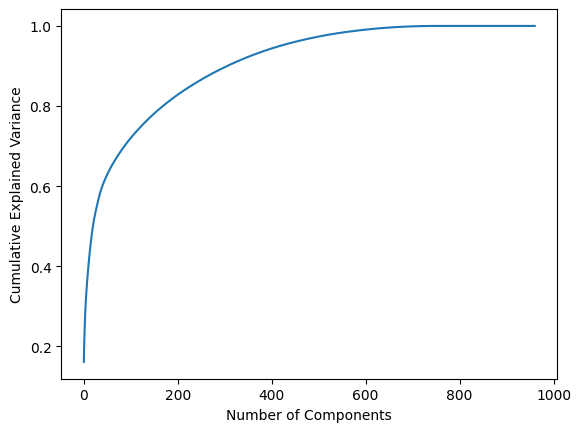

In [ ]:
# SVD 수행
U, S, VT = np.linalg.svd(data)

# 누적 설명 분산 계산
explained_variance = np.cumsum(S**2) / np.sum(S**2)

# 설명된 분산 플롯
plt.plot(explained_variance)
plt.show()

In [ ]:
np.where(explained_variance>0.95)

(array([418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430,
        431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443,
        444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456,
        457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469,
        470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482,
        483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495,
        496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508,
        509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521,
        522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534,
        535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547,
        548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560,
        561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573,
        574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586,
        587, 588, 589, 590, 591, 592, 593, 594, 595

In [ ]:
# 예제 데이터 로드
data = one_hot_item_df

# SVD 수행
svd = TruncatedSVD(n_components=418)  # 적절한 컴포넌트 수를 선택
user_factors = svd.fit_transform(data)
item_factors = svd.components_.T

# 추천 점수 계산
predicted_scores = np.dot(user_factors, item_factors.T)

# 사용자별 아이템 추천
def recommend_items(user_id, user_item_matrix, predicted_scores, n):
    user_index = user_item_matrix.index.get_loc(user_id)
    user_scores = predicted_scores[user_index]
    user_items = user_item_matrix.iloc[user_index]

    # 사용자가 이미 가지고 있는 아이템을 제외
    recommendations = [(item, score) for item, score in enumerate(user_scores) if user_items[item] == 0]
    recommendations.sort(key=lambda x: x[1], reverse=True)

    reco_item=[data.columns[i[0]] for i in recommendations[:n]]
    return reco_item

# 예시: 사용자 ID가 1인 사용자를 위한 추천
user_id = 0
n = 5
recommendations = recommend_items(user_id, data, predicted_scores, n)

print(f"{user_id} 유저 추천 아이템은 {recommendations} 입니다")


0 유저 추천 아이템은 ['러버블 플레이', '히어로즈 초월석 명찰 반지', '세리아 명찰 반지', '일루전 링 : 분홍색토끼 (L)', '루더스 토이카'] 입니다


In [ ]:
type(recommended_items)

list

In [ ]:
data.columns[0]

'투명 신발'